In [16]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin

In [19]:
#Load Data
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.55, random_state=41)

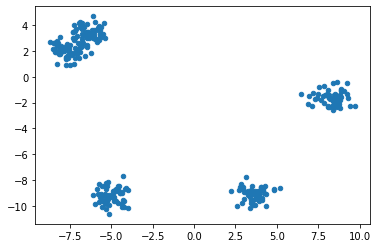

In [30]:
#Plot Data
plt.scatter(X[:, 0], X[:, 1], s=20)

In [35]:
# Define find_clusters() function
def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

In [36]:
#Find Clusters
centers, labels = find_clusters(X, 4)
print("Coordinates of centers are:\n", centers, "\n\nPoints are labeled as belonging to cluster:\n", labels)

Coordinates of centers are:
 [[ 8.31908856 -1.65869284]
 [-5.00739174 -9.21772813]
 [-6.99980003  2.7364513 ]
 [ 3.62610035 -9.10308448]] 

Points are labeled as belonging to cluster:
 [2 0 2 2 1 2 3 2 2 0 2 2 2 2 1 2 0 2 3 3 2 3 3 2 1 2 2 1 2 1 0 3 3 1 2 3 2
 2 2 2 0 2 3 0 0 2 3 2 1 1 0 1 2 1 3 0 2 3 3 2 1 0 2 3 1 0 0 3 0 0 1 2 0 2
 3 2 2 0 2 3 3 1 0 2 1 1 0 2 3 3 3 1 1 1 3 1 2 2 0 3 2 2 3 3 2 2 2 3 0 1 1
 2 0 2 0 2 2 0 3 0 0 0 2 1 0 3 3 3 1 1 3 3 1 1 1 1 2 3 0 3 3 2 2 2 2 2 2 2
 0 1 1 3 0 1 3 3 2 2 2 3 1 2 2 3 2 2 2 0 3 1 3 0 0 1 0 1 2 2 2 0 0 3 0 0 2
 2 2 2 0 1 2 2 2 1 2 2 2 0 3 2 2 2 2 2 2 3 1 2 2 1 3 1 0 2 3 3 2 2 2 0 0 2
 0 2 2 3 3 0 2 1 2 2 0 1 1 1 0 3 0 2 2 1 2 3 0 1 0 0 3 1 3 2 0 2 3 0 1 2 1
 1 2 2 3 0 2 2 2 1 1 0 2 1 1 0 0 2 3 3 1 2 2 2 2 2 0 2 0 1 3 0 2 2 2 2 1 2
 1 1 3 2]


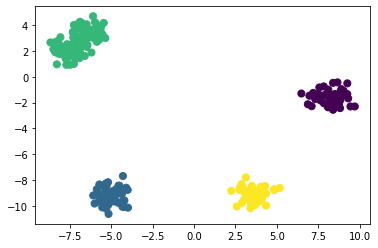

In [37]:
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 50, cmap='viridis');